In [1]:
!pip install catboost

     ------------------------------------- 101.0/101.0 MB 24.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


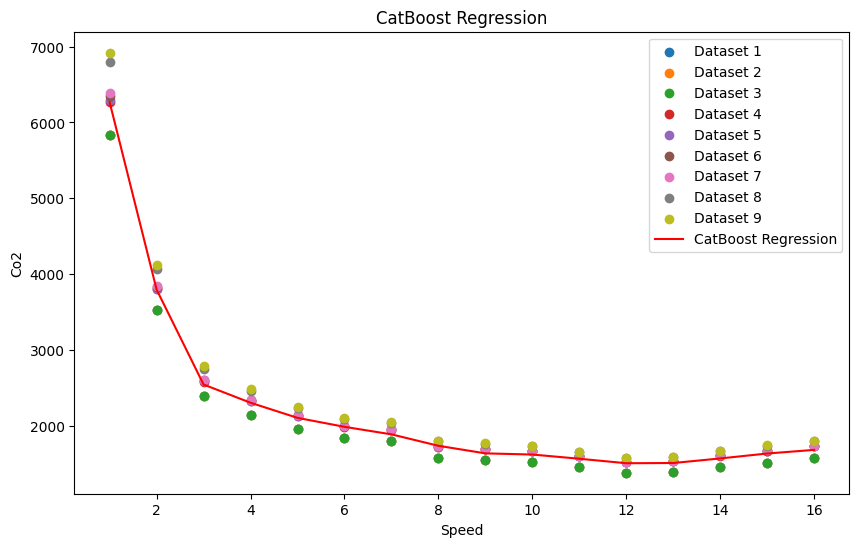

 Speed  Predicted Co2
     1    6266.511371
     2    3795.637137
     3    2543.274848
     4    2302.922187
     5    2103.554090
     6    1985.332648
     7    1886.055050
     8    1735.158853
     9    1635.238676
    10    1619.849775
    11    1564.402045
    12    1505.148402
    13    1508.084843
    14    1568.335440
    15    1633.312898
    16    1681.208967


In [2]:
#working well

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from catboost import CatBoostRegressor

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files, assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Create and fit the CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, silent=True)
catboost_model.fit(all_speed, all_rates)

# Predict using the model
catboost_predictions = catboost_model.predict(all_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, catboost_model.predict(speed), color='red', label='CatBoost Regression')
plt.title('CatBoost Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values = catboost_model.predict(speed)
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))
